#Import libraries

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=da87c52be901be95fe33530f38e7c6282b4de579fdcf93dc37ae80c93930d5d0
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.tree            import DecisionTreeClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif,VarianceThreshold, RFE, RFECV
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import random
from sklearn.manifold import TSNE
from tensorflow.keras.utils import to_categorical

#Reading Data

In [14]:
df_train=pd.read_csv('training_dataset.csv')
df_valid=pd.read_csv('validation_dataset.csv')
df_test=pd.read_csv('test_dataset.csv')
df_train= df_train.drop('Id',axis=1)
df_valid= df_valid.drop('Id',axis=1)
df_test = df_test.drop ('Id',axis=1)

#######################################

X_train = df_train.drop('Cover_Type',axis=1)
y_train = df_train['Cover_Type']

X_valid = df_valid.drop('Cover_Type',axis=1)
y_valid = df_valid['Cover_Type']

x_test  = df_test.drop('Cover_Type',axis=1)
y_test  = df_test['Cover_Type']

In [3]:
df_train=pd.read_csv('training_dataset.csv')
df_valid=pd.read_csv('validation_dataset.csv')
df_test=pd.read_csv('test_dataset.csv')


#EDA

In [5]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)
y_train.shape

(8286, 55)
(1498, 55)
(1525, 55)


(8286,)

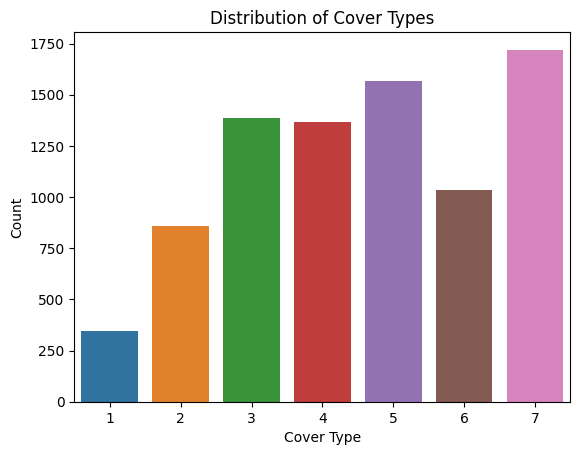

In [39]:
# Check the distribution of the target variable "Cover_Type"
sns.countplot(x='Cover_Type', data=df_train)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

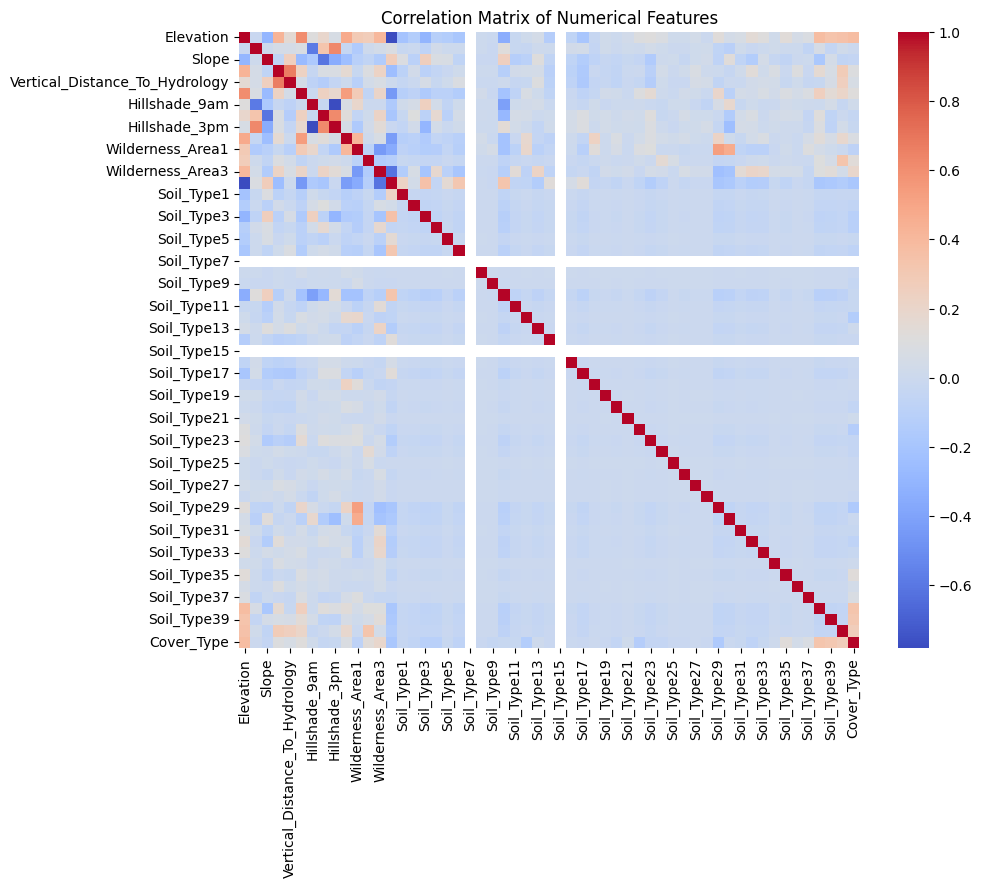

In [45]:
# Check the correlation between numerical features
correlation_matrix = df_train.iloc[:, :].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

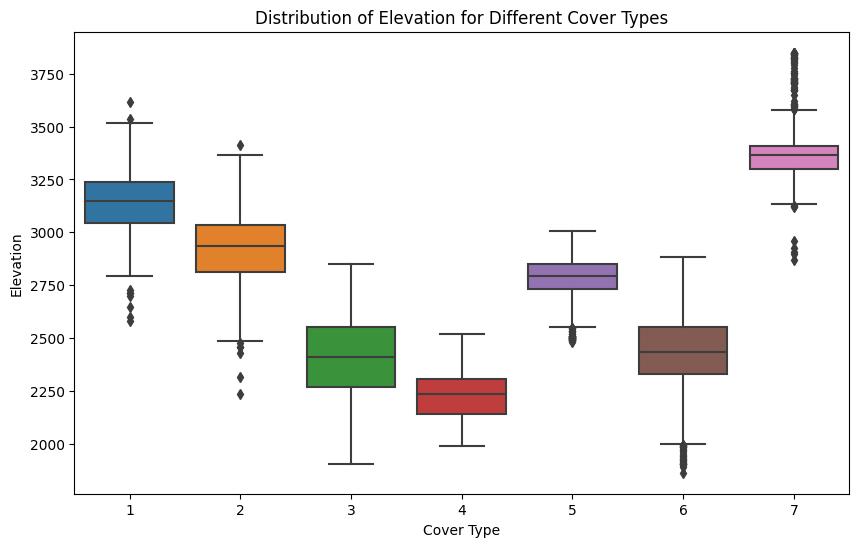

In [41]:
# Check the distribution of "Elevation" for different cover types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df_train)
plt.title('Distribution of Elevation for Different Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Elevation')
plt.show()

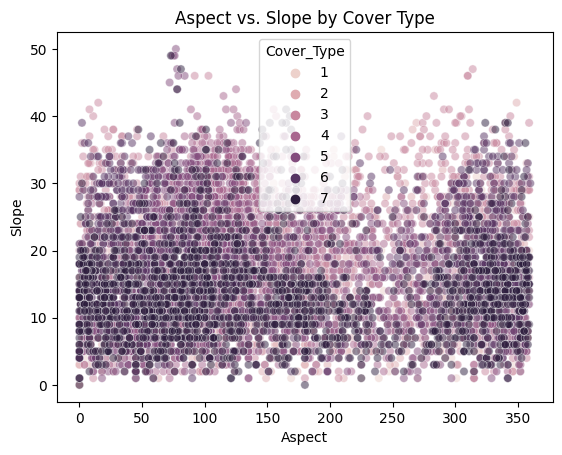

In [42]:
# Check the relationship between "Aspect" and "Slope"
sns.scatterplot(x='Aspect', y='Slope', hue='Cover_Type', data=df_train, alpha=0.5)
plt.title('Aspect vs. Slope by Cover Type')
plt.xlabel('Aspect')
plt.ylabel('Slope')
plt.show()

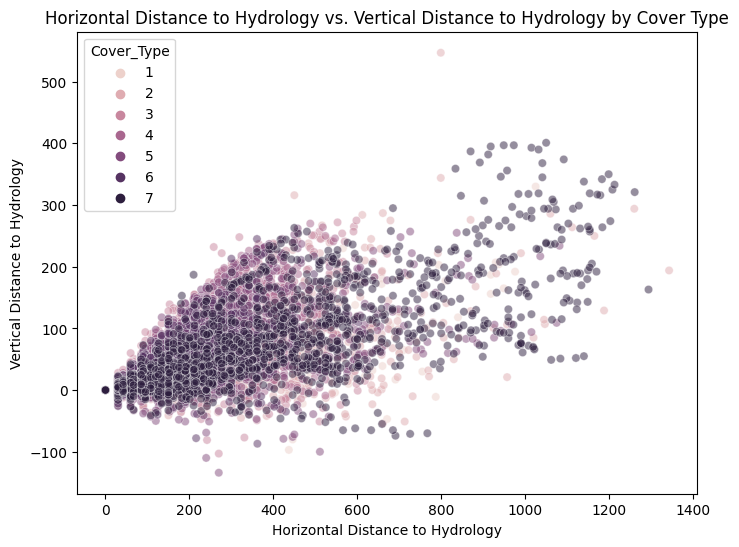

In [43]:
# Check the relationship between "Horizontal_Distance_To_Hydrology" and "Vertical_Distance_To_Hydrology"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', hue='Cover_Type', data=df_train, alpha=0.5)
plt.title('Horizontal Distance to Hydrology vs. Vertical Distance to Hydrology by Cover Type')
plt.xlabel('Horizontal Distance to Hydrology')
plt.ylabel('Vertical Distance to Hydrology')
plt.show()

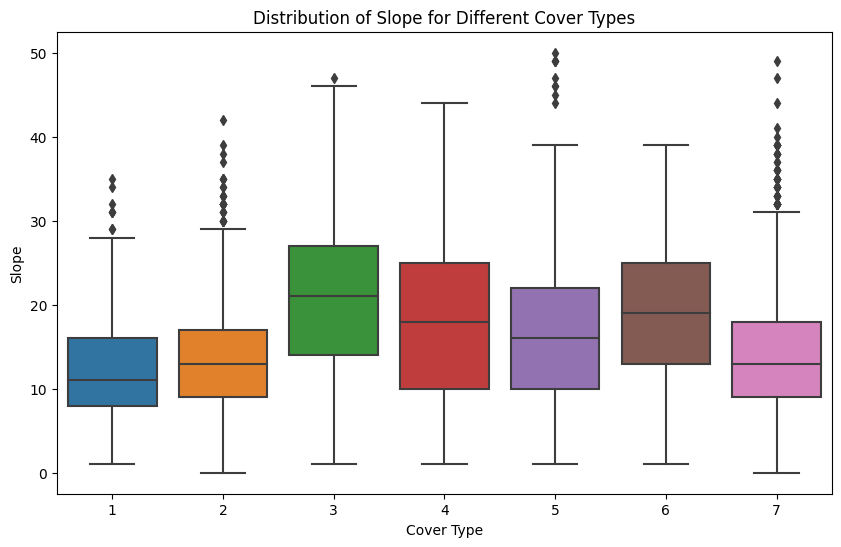

In [51]:
# Check the distribution of "Slope" for different cover types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Slope', data=df_train)
plt.title('Distribution of Slope for Different Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Slope')
plt.show()

In [52]:
# Display general information about the dataset
print(df_train.info())

# Display basic statistics of numerical features
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8286 entries, 0 to 8285
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           8286 non-null   int64
 1   Aspect                              8286 non-null   int64
 2   Slope                               8286 non-null   int64
 3   Horizontal_Distance_To_Hydrology    8286 non-null   int64
 4   Vertical_Distance_To_Hydrology      8286 non-null   int64
 5   Horizontal_Distance_To_Roadways     8286 non-null   int64
 6   Hillshade_9am                       8286 non-null   int64
 7   Hillshade_Noon                      8286 non-null   int64
 8   Hillshade_3pm                       8286 non-null   int64
 9   Horizontal_Distance_To_Fire_Points  8286 non-null   int64
 10  Wilderness_Area1                    8286 non-null   int64
 11  Wilderness_Area2                    8286 non-null   int64
 12  Wilder

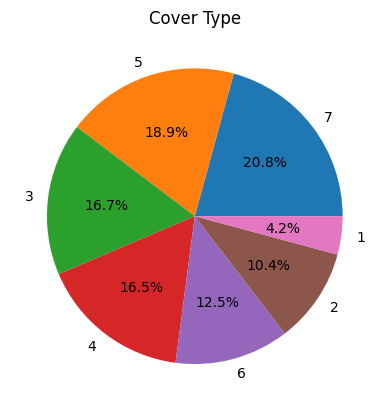

In [36]:
counts=df_train['Cover_Type'].value_counts()
plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
plt.title('Cover Type')
plt.show()

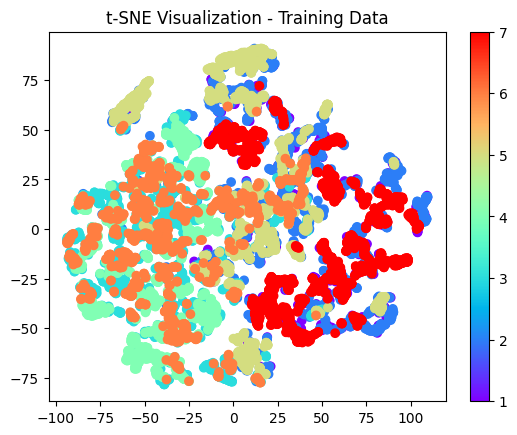

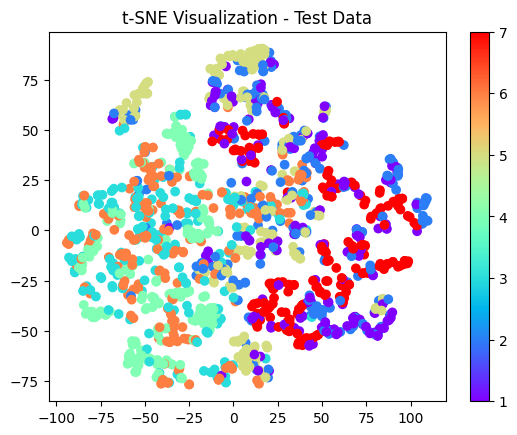

In [6]:
X_combined = np.vstack((X_train, X_test))

# Perform t-SNE on the combined data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined)

# Separate the t-SNE results for training and test data
X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

# Visualization of t-SNE for training data
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='rainbow')
plt.title('t-SNE Visualization - Training Data')
plt.colorbar()
plt.show()

# Visualization of t-SNE for test data
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='rainbow')
plt.title('t-SNE Visualization - Test Data')
plt.colorbar()
plt.show()

#Q1) Obtain a baseline performance
Apply all ML methods below on the provided dataset to obtain baseline performance.
Plot confusion matrix and calculate the accuracy for each methods, and plot them in a bar-chart as
baseline.

❏ KNN

❏ LogisticRegression

❏ SVM

❏ DecisionTreeClassifier

❏ Naive Bayes Classifier

The best baseline performance will be used as the first baseline result for remaining analysis.
In thenext phase. the best 2 ML models should be used as performance calculations.

In [10]:
def compare_classifiers(X_train, y_train, X_test, y_test):
    # Initializing the classifiers
    knn = KNeighborsClassifier()
    logreg = LogisticRegression()
    svm = SVC()
    dt = DecisionTreeClassifier()
    nb = GaussianNB()

    classifiers = [('KNN', knn), ('Logistic Regression', logreg), ('SVM', svm), ('Decision Tree', dt), ('Naive Bayes', nb)]

    accuracy_list = []
    cm_list = []

    # Training and evaluating each classifier
    for clf_name, clf in classifiers:
        # Training the classifier
        clf.fit(X_train, y_train)

        # Predicting on the test set
        y_pred = clf.predict(X_test)

        # Calculating accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)

        # Calculating confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm_list.append(cm)

        # Plotting confusion matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
        plt.title(f'Confusion Matrix - {clf_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Creating a DataFrame to store accuracy scores
    accuracy_df = pd.DataFrame({'Classifier': [clf_name for clf_name, _ in classifiers], 'Accuracy': accuracy_list})

    # Plotting the accuracy scores
    custom_palette = ['#2ecc71', '#3498db', '#e74c3c', '#f39c12', '#9b59b6']

    plt.figure(figsize=(10, 6))

    # Use a barplot with custom colors
    sns.barplot(data=accuracy_df, x='Classifier', y='Accuracy', palette=custom_palette)

    # Adjust the y-axis limits
    plt.ylim(0, 1)

    # Set the plot title and labels
    plt.xlabel('Classifier', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Baseline Performance - Accuracy Comparison', fontsize=14)

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add value labels on top of each bar
    for index, value in enumerate(accuracy_df['Accuracy']):
        plt.text(index, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

    # Add gridlines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a fancy background color to the plot
    plt.gca().patch.set_facecolor('#f0f0f0')

    # Remove top and right spines for a cleaner look
    sns.despine()

    plt.show()
    # Finding the best model accuracy and model name
    best_accuracy = accuracy_df['Accuracy'].max()
    best_model = accuracy_df.loc[accuracy_df['Accuracy'].idxmax(), 'Classifier']

    print(f"Best Model: {best_model}")
    print(f"Best Accuracy: {best_accuracy}")

    return accuracy_df, best_accuracy, accuracy_list


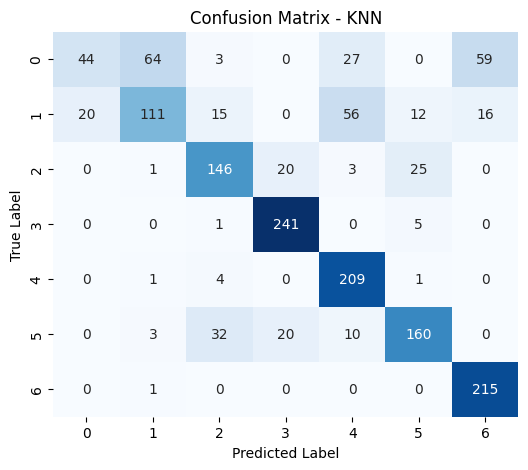

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


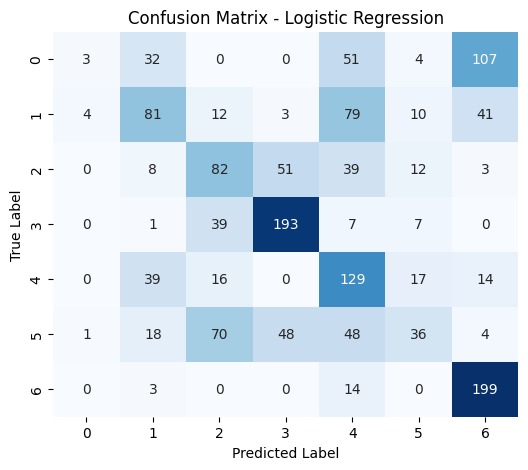

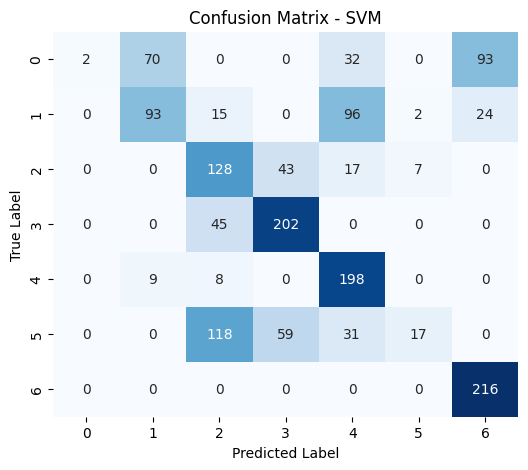

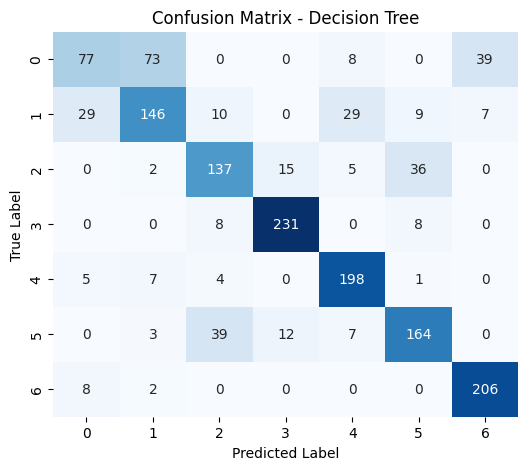

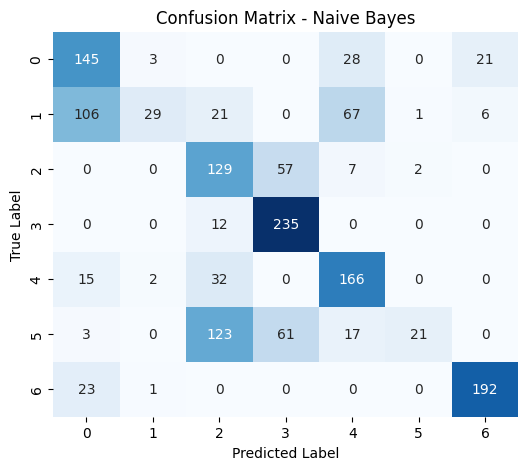

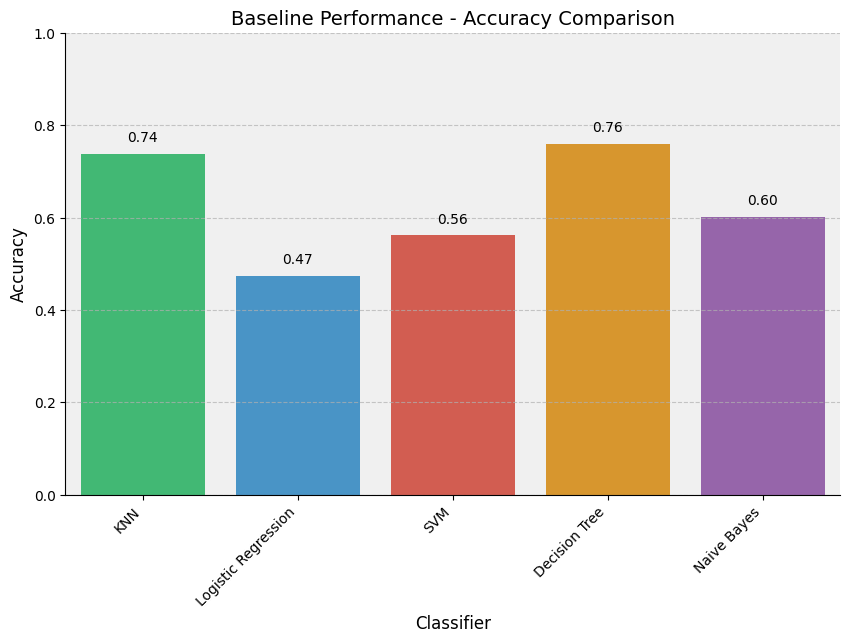

Best Model: Decision Tree
Best Accuracy: 0.76


In [15]:
accuracy_df, best_accuracy, accuracy_list= compare_classifiers(X_train, y_train, X_test, y_test)


#Q2) First Improvement strategy : Comparing dimensionality reduction to Feature selection

● Apply feature selection methods.

● One filter based approach and one wrapper based approch.

● For wrapper based approach, you need to provide training set, test set, number of features and ML model
for training and test performances. You need to select 2 best performer ML models from Q1 stage for
wrapper and filter based feature selection methods.

● Performance comparisons will be the number of features vs the accuracy and also you need to add
baseline performance of ML model you obtained by Q1 stage as constant dotted line with different color.

● You need to provide 4 figures and 2 for each feature selection method. 2 figures for each method are
required because you need to show ML performance is better than baseline performance of the ML
models.

● After determining the best performance in this stage that will be first improvement, you need to use
the best feature subset and the best ML model for remaining part of the project.

##Filter Method

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarni

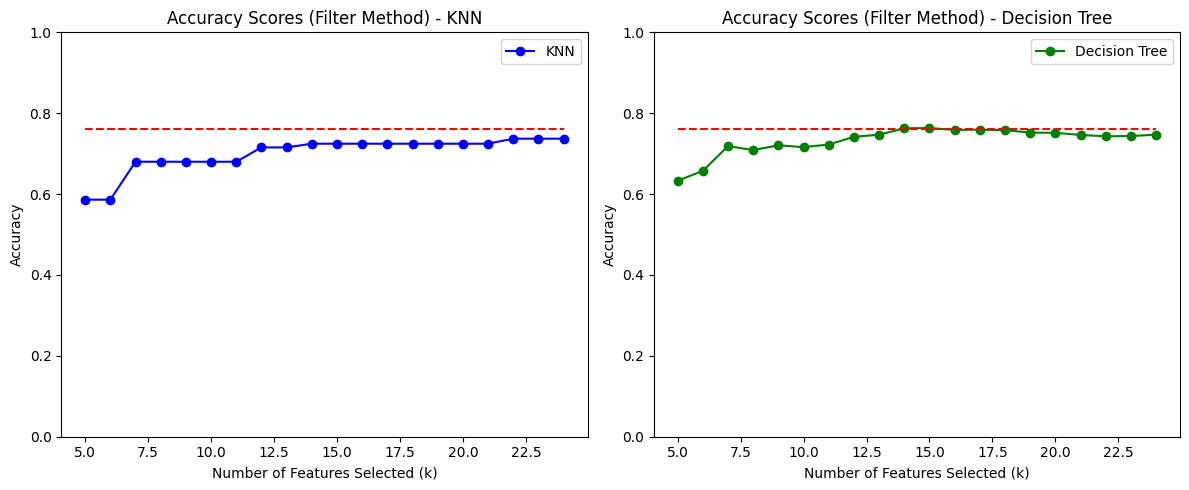

Best K for KNN: 22
Best K for Decision Tree: 15
Accuracy for KNN (Best K): 0.7370491803278688
Accuracy for Decision Tree (Best K): 0.7632786885245901
baseline: 0.7632786885245901


In [16]:
def feature_selection_filter_method(X_train, y_train, X_test, y_test, k_range, baseline, random_seed=None):
    # Set the random seed for reproducibility
    if random_seed is not None:
        np.random.seed(random_seed)

    knn_scores = []
    dt_scores = []

    # Loop over the k values
    for k in k_range:
        # Apply feature selection using filter method
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_new = selector.fit_transform(X_train, y_train)

        # Transform the test data using the same selector
        X_test_new = selector.transform(X_test)

        # Train and evaluate a KNN model
        knn = KNeighborsClassifier()
        knn.fit(X_train_new, y_train)
        knn_score = knn.score(X_test_new, y_test)
        knn_scores.append(knn_score)

        # Train and evaluate a Decision Tree model
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train_new, y_train)
        dt_score = dt.score(X_test_new, y_test)
        dt_scores.append(dt_score)

    # Get the best k for KNN and Decision Tree models
    best_k_knn = k_range[knn_scores.index(max(knn_scores))]
    best_k_dt = k_range[dt_scores.index(max(dt_scores))]
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the accuracy scores for KNN on the first subplot
    axs[0].plot(k_range, knn_scores, 'bo-', label='KNN')
    axs[0].plot([min(k_range), max(k_range)], [baseline, baseline], 'r--')
    axs[0].set_title('Accuracy Scores (Filter Method) - KNN')
    axs[0].set_xlabel('Number of Features Selected (k)')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_ylim(0, 1.0)
    axs[0].legend()

    # Plot the accuracy scores for Decision Tree on the second subplot
    axs[1].plot(k_range, dt_scores, 'go-', label='Decision Tree')
    axs[1].plot([min(k_range), max(k_range)], [baseline, baseline], 'r--')
    axs[1].set_title('Accuracy Scores (Filter Method) - Decision Tree')
    axs[1].set_xlabel('Number of Features Selected (k)')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_ylim(0, 1.0)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    return knn_scores, dt_scores, best_k_knn, best_k_dt

# Set the range of k values
k_range = range(5, 25)

# Set the baseline accuracy to the best accuracy from q1
baseline = best_accuracy

# Set the fixed seed
fixed_seed = 42

# Apply feature selection using filter method and plot the accuracy scores for each k
knn_scores, dt_scores, best_k_knn, best_k_dt = feature_selection_filter_method(x_train, y_train, x_test, y_test, k_range, baseline, random_seed=fixed_seed)

# Print the best k for KNN and Decision Tree models
print('Best K for KNN:', best_k_knn)
print('Best K for Decision Tree:', best_k_dt)
f_baseline=max(max(dt_scores),max(knn_scores))

# Print the accuracies for the best k values
print('Accuracy for KNN (Best K):', max(knn_scores))
print('Accuracy for Decision Tree (Best K):', max(dt_scores))
print('baseline:',f_baseline)

In [18]:
selector = SelectKBest(score_func=f_classif,k=15)
X_train_new = selector.fit_transform(x_train, y_train)
# Transform the test data using the same selector
X_test_new = selector.transform(x_test)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_new, y_train, )
dt_score = dt.score(X_test_new, y_test)
print(f'score:{dt_score}')
# dtf_y_pred = dt.predict(X_test_new)

score:0.7632786885245901


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 28] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


##Wrapper Method

In [19]:
def feature_selection_wrapper_method(x_train, y_train, x_test, y_test, k_range, baseline, random_seed=None):
    knn_scores = []
    dt_scores = []
    best_k_knn = 0
    best_k_dt = 0
    best_accuracy_knn = 0
    best_accuracy_dt = 0

    # Set the random seed for reproducibility
    if random_seed is not None:
        import numpy as np
        np.random.seed(random_seed)

    # Apply feature selection using wrapper method
    estimator = DecisionTreeClassifier(random_state=random_seed)
    selector = RFECV(estimator, cv=5,n_jobs=-1)
    X_train_new = selector.fit_transform(x_train, y_train)

    # Transform the test data using the same selector
    X_test_new = selector.transform(x_test)

    # Loop over the number of features selected
    for n_features_selected in range(1, selector.n_features_ + 1):
        # Train and evaluate a KNN model
        knn = KNeighborsClassifier()
        knn.fit(X_train_new[:, :n_features_selected], y_train)
        knn_score = knn.score(X_test_new[:, :n_features_selected], y_test)
        knn_scores.append(knn_score)

        # Train and evaluate a Decision Tree model
        dt = DecisionTreeClassifier(random_state=random_seed)
        dt.fit(X_train_new[:, :n_features_selected], y_train)
        dt_score = dt.score(X_test_new[:, :n_features_selected], y_test)
        dt_scores.append(dt_score)

        # Track the best accuracy and the best k for KNN
        if knn_score > best_accuracy_knn:
            best_accuracy_knn = knn_score
            best_k_knn = n_features_selected

        # Track the best accuracy and the best k for Decision Tree
        if dt_score > best_accuracy_dt:
            best_accuracy_dt = dt_score
            best_k_dt = n_features_selected

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the accuracy scores for KNN on the first subplot
    axs[0].plot(range(1, selector.n_features_ + 1), knn_scores, 'bo-', label='KNN')
    axs[0].plot([1, selector.n_features_], [baseline, baseline], 'r--')
    axs[0].set_title('Accuracy Scores (Wrapper Method) - KNN')
    axs[0].set_xlabel('Number of Features Selected')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_ylim(0, 1.0)
    axs[0].legend()

    # Plot the accuracy scores for Decision Tree on the second subplot
    axs[1].plot(range(1, selector.n_features_ + 1), dt_scores, 'go-', label='Decision Tree')
    axs[1].plot([1, selector.n_features_], [baseline, baseline], 'r--')
    axs[1].set_title('Accuracy Scores (Wrapper Method) - Decision Tree')
    axs[1].set_xlabel('Number of Features Selected')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_ylim(0, 1.0)
    axs[1].legend()

    plt.tight_layout()
    plt.show()
    print('Best K for KNN:', best_k_knn)
    print('Best K for Decision Tree:', best_k_dt)
    print('Best Accuracy for KNN:', best_accuracy_knn)
    print('Best Accuracy for Decision Tree:', best_accuracy_dt)

    return knn_scores, dt_scores, best_accuracy_dt


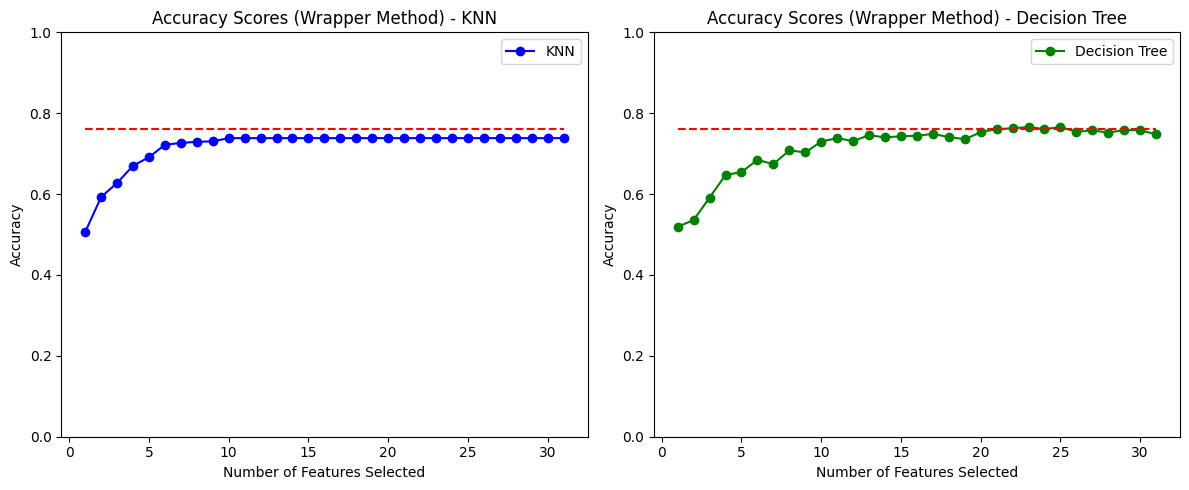

Best K for KNN: 10
Best K for Decision Tree: 23
Best Accuracy for KNN: 0.7383606557377049
Best Accuracy for Decision Tree: 0.7659016393442623
w_baseline:0.7659016393442623


In [21]:
# Set the range of k values
k_range = range(5, 25)

# Set the baseline accuracy to the best accuracy from q1
baseline = best_accuracy

# Set the random seed
random_seed = 42

# Apply feature selection using wrapper method and plot the accuracy scores for each k
knn_scores, dt_scores,best_accuracy_dt = feature_selection_wrapper_method(X_train, y_train, X_test, y_test, k_range, baseline, random_seed)
w_baseline = max(max(dt_scores),max(knn_scores))
print(f'w_baseline:{w_baseline}')

#Q3) Adding more machine learning model
• Apply Random Forest and 2 ensembles techniques to get better performance.

• Compare the performance of new techniques with the first improvement through
confusion matrix.

• If the new results are better than the first improvement, the new results will be assumed as the second improvement.
 Otherwise, the first improvement should be kept for the remaining analysis.

In [22]:
baseline= max(f_baseline,w_baseline)
print(w_baseline)
print(f_baseline)
print(baseline)


0.7659016393442623
0.7632786885245901
0.7659016393442623


In [23]:
def ensomble_methods(x_train, y_train, x_test, y_test, baseline):

    knn_scores = []
    dt_scores  = []
    rf_scores  = []
    bg_scores  = []
    ada_scores = []

    # Create a dictionary to store the maximum accuracy score for each model
    max_scores = {'KNN': 0, 'Decision Tree': 0, 'Random Forest': 0, 'Bagging': 0, 'AdaBoost': 0}

    # Loop over the models and train/evaluate them
    for model_name, model in [('KNN', KNeighborsClassifier(n_jobs=-1)), ('Decision Tree', DecisionTreeClassifier(random_state=42)),
                              ('Random Forest', RandomForestClassifier(random_state=42)), ('Bagging', BaggingClassifier(random_state=42)),
                              ('AdaBoost', AdaBoostClassifier(random_state=42))]:
        model.fit(x_train, y_train)
        model_score = model.score(x_test, y_test)
        if model_score > max_scores[model_name]:
            max_scores[model_name] = model_score

    # Find the max value among all max scores
    new_baseline = max(max_scores.values())

    # Plot the bar plot of the maximum accuracy scores with the baselines
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(max_scores.keys(), [score*100 for score in max_scores.values()], label='Max Accuracy Scores')
    ax.axhline(y=baseline*100, color='r', linestyle='--', label='Baseline')
    ax.set_title('Maximum Accuracy Scores')
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy (%)')
    ax.set_ylim(0, 100)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()



    # Print the maximum accuracy score for each model
    print('Maximum Accuracy Scores:')
    for model_name, score in max_scores.items():
        print(f'{model_name}: {score*100:.2f}%')

    # Return the new baseline and the scores for all models
    return new_baseline, max_scores

In [24]:
X_train_new_df = pd.DataFrame(X_train_new)

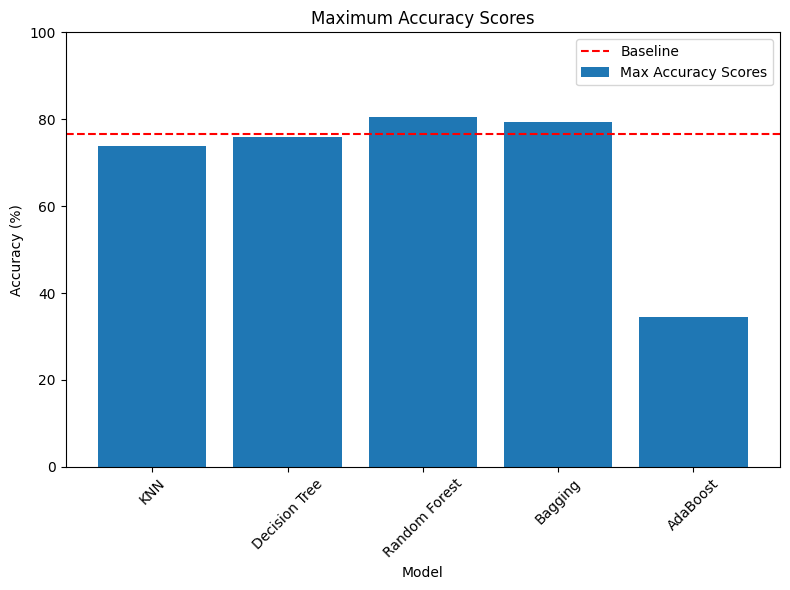

Maximum Accuracy Scores:
KNN: 73.84%
Decision Tree: 75.80%
Random Forest: 80.59%
Bagging: 79.48%
AdaBoost: 34.43%


In [25]:
new_baseline, max_scores=ensomble_methods( x_train, y_train, x_test, y_test,baseline )

In [26]:
rf= RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
y_valid_pred=rf.predict(x_valid)
y_test_pred=rf.predict(x_test)

#Q4) Supervised & Unsupervised Combination via PKI
Using the knowledge in the appendix, please find the best number of cluster to improve the supervised model.

You use previous best supervised performance in stage Q3 and you need to
show if SOFM provides improvement through PKI Strategy.


You need to use 6*6, 7*7, 8*8, 9*9, 10*10, 11*11 and 12*12 and PKI model as given below.

Please show the best SOFM structure using number of neurons vs accuracy figure with given the second improvement as red dotten line.

If you get better result than the second one please use this accuracy as the third improvement in the next phase.

PKI model will be realized via Deep Neural Network (DNN) which has 4 hidden layers having 30 neurons of each. Use Adam optimizer, set learning rate as 0.001 and choose tanh as the activation function.

 You don’t have to use this DNN structure. You can find your best PKI
model to provide better result than the stage Q3.

#SOM &PKI

In [27]:
df_train=pd.read_csv('training_dataset.csv')
df_valid=pd.read_csv('validation_dataset.csv')
df_test=pd.read_csv('test_dataset.csv')
df_train= df_train.drop('Id',axis=1)
df_valid= df_valid.drop('Id',axis=1)
df_test = df_test.drop ('Id',axis=1)

#######################################

x_train = df_train.drop('Cover_Type',axis=1)
y_train = df_train['Cover_Type']

x_valid = df_valid.drop('Cover_Type',axis=1)
y_valid = df_valid['Cover_Type']

x_test  = df_test.drop('Cover_Type',axis=1)
y_test  = df_test['Cover_Type']


# Concatenate the train and valid DataFrames vertically
combined_df = pd.concat([df_train, df_valid], axis=0)

# Reset the index of the combined DataFrame
combined_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
combined_df.columns
x_combined= combined_df.drop('Cover_Type',axis=1)
y_combined= combined_df['Cover_Type']


In [30]:
#rf
y_com_rf=rf.predict(x_combined)

#SOM
dimensions=[(6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12)]
y_predicted_comb_sofm=[]
for dim in dimensions:
  som = MiniSom(dim[0], dim[1], x_combined.shape[1], sigma=1, learning_rate=0.5,random_seed=42)
  som.random_weights_init(x_combined.values)
  som.train_batch(np.array(x_combined), 1000, verbose=False)
  y_sofm_comb_pred = np.array([som.winner(x) for x in np.array(x_combined)])
  y_predicted_comb_sofm.append(y_sofm_comb_pred)

# print(y_predicted_comb_sofm)
nd_arrys=[]
for i in y_predicted_comb_sofm:
  nd_arry=np.ravel_multi_index(i.T, dim, mode='raise', order='C')
  nd_arrys.append(nd_arry)


best_val_accuracy = 0.0
best_val_accuracy_index = -1
best_label = None
val_accuracy_values = []

for idx, label in enumerate(nd_arrys):
    print(f"Label: {label}")

    data_comb_train = {
        'y_comb': y_combined,
        'y_com_rf': y_com_rf
    }
    df_comb = pd.DataFrame(data_comb_train)

    df_comb['som_mapped_labels'] = label
    X_train = df_comb.drop('y_comb', axis=1)
    Y_train = df_comb['y_comb'] - 1
    Y_train = to_categorical(Y_train)

    # Build the Deep Neural Network (DNN)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(30, activation='tanh', input_shape=(2,)),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model and store the validation accuracy
    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=True)
    val_accuracy = max(history.history['val_accuracy'])
    val_accuracy_values.append(val_accuracy)

    # Check if this model has the best validation accuracy so far
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_val_accuracy_index = idx
        best_label = label

print("Best validation accuracy index:", best_val_accuracy_index)
print("Best validation accuracy label:", best_label)
print("Best validation accuracy value:", best_val_accuracy)



# # ################################################################################################################
print('Evaluation')
y_test_sofm=[]
for dim in dimensions:
  y_sofm_test_pred = np.array([som.winner(x) for x in np.array(x_test)])
  y_test_sofm.append(y_sofm_test_pred)


nd_test_arrys=[]
for i in y_test_sofm:
  nd_arry=np.ravel_multi_index(i.T, dim, mode='raise', order='C')
  nd_test_arrys.append(nd_arry)


for label in nd_test_arrys:

  data_test = {
        'y_test':y_test,
        'y_com_rf': y_test_pred}

  df_test=pd.DataFrame(data_test)

  df_test['som_mapped_labels']=label
  X_test = df_test.drop('y_test', axis=1)
  Y_test = df_test['y_test']-1
  Y_test = to_categorical(Y_test)

  print(f'SIZE {dim}')
  #Evaluation
  model.evaluate(X_test,Y_test)


Label: [62 49 61 ... 25 62 25]
Epoch 1/10
245/245 [==============================] - 2s 4ms/step - loss: 1.2219 - accuracy: 0.5333 - val_loss: 1.2454 - val_accuracy: 0.6444
Epoch 2/10
245/245 [==============================] - 1s 5ms/step - loss: 0.4052 - accuracy: 0.9278 - val_loss: 1.1277 - val_accuracy: 0.8457
Epoch 3/10
245/245 [==============================] - 3s 12ms/step - loss: 0.1388 - accuracy: 0.9971 - val_loss: 1.1974 - val_accuracy: 0.8498
Epoch 4/10
245/245 [==============================] - 1s 6ms/step - loss: 0.0529 - accuracy: 0.9996 - val_loss: 1.3000 - val_accuracy: 0.8518
Epoch 5/10
245/245 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 1.0000 - val_loss: 1.3946 - val_accuracy: 0.8518
Epoch 6/10
245/245 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.4458 - val_accuracy: 0.8518
Epoch 7/10
245/245 [==============================] - 1s 4ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.51

#Q5) Applying parameter fine tuning to get better performance from the
previous best performance.

 This is final stage for obtaining the improvement. You need to try different structures for Deep Neural Network for PKI structure.

Please try more or less hidden layers and neuronsof each hidden layers which you find in the stage Q4 to show the best performance and the improvement.

Please plot each tunning performance of hidden layers and neurons of each
hidden layers with given the best accuracy so far as red dotted line.

Label: [62 49 61 ... 25 62 25]
Epoch 1/10
245/245 [==============================] - 7s 9ms/step - loss: 1.9947 - accuracy: 0.2250 - val_loss: 1.5572 - val_accuracy: 0.5468
Epoch 2/10
245/245 [==============================] - 1s 4ms/step - loss: 1.4411 - accuracy: 0.3881 - val_loss: 1.4720 - val_accuracy: 0.5590
Epoch 3/10
245/245 [==============================] - 1s 4ms/step - loss: 1.2025 - accuracy: 0.4966 - val_loss: 1.2868 - val_accuracy: 0.6597
Epoch 4/10
245/245 [==============================] - 1s 4ms/step - loss: 1.0660 - accuracy: 0.5573 - val_loss: 1.2037 - val_accuracy: 0.7670
Epoch 5/10
245/245 [==============================] - 1s 4ms/step - loss: 0.9798 - accuracy: 0.5912 - val_loss: 1.1957 - val_accuracy: 0.7230
Epoch 6/10
245/245 [==============================] - 1s 4ms/step - loss: 0.8865 - accuracy: 0.6278 - val_loss: 1.1621 - val_accuracy: 0.8058
Epoch 7/10
245/245 [==============================] - 1s 4ms/step - loss: 0.8572 - accuracy: 0.6346 - val_loss: 1.162

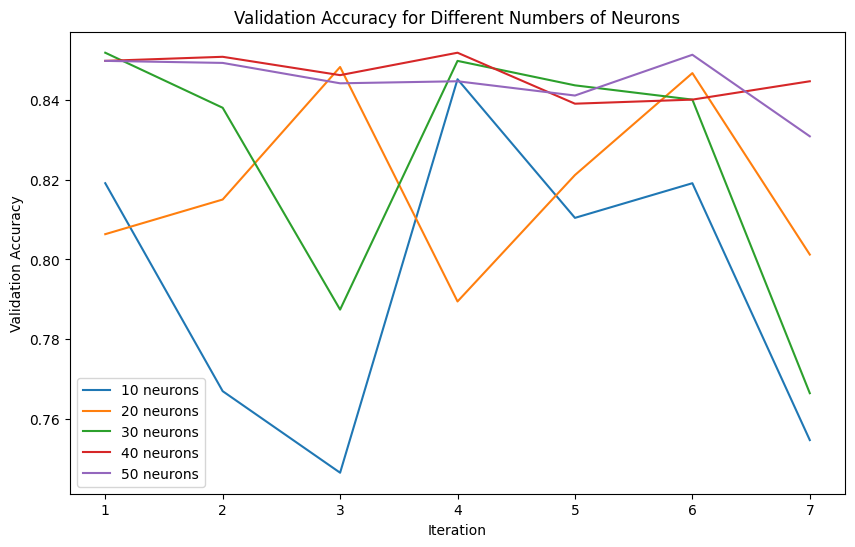

In [47]:
import matplotlib.pyplot as plt

# Define the range of neuron values to try
neuron_values = [10, 20, 30, 40, 50]

# Store the results in dictionaries
results = {}
val_accuracy_values_dict = {}

for num_neurons in neuron_values:
    val_accuracy_values = []
    for idx, label in enumerate(nd_arrys):
        print(f"Label: {label}")

        data_comb_train = {
            'y_comb': y_combined,
            'y_com_rf': y_com_rf
        }
        df_comb = pd.DataFrame(data_comb_train)

        df_comb['som_mapped_labels'] = label
        X_train = df_comb.drop('y_comb', axis=1)
        Y_train = df_comb['y_comb'] - 1
        Y_train = to_categorical(Y_train)

        # Build the Deep Neural Network (DNN) with the current number of neurons
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(num_neurons, activation='tanh', input_shape=(2,)),
            tf.keras.layers.Dense(num_neurons, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(num_neurons, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(num_neurons, activation='tanh'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(7, activation='softmax')
        ])

        # Compile the model
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Train the model and store the validation accuracy
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

        history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=True, workers=-1)
        val_accuracy = max(history.history['val_accuracy'])
        val_accuracy_values.append(val_accuracy)

        # Check if this model has the best validation accuracy so far
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_val_accuracy_index = idx
            best_label = label

    # Store the validation accuracy values for the current number of neurons
    val_accuracy_values_dict[num_neurons] = val_accuracy_values

    # Store the best validation accuracy for the current number of neurons
    results[num_neurons] = {
        "best_val_accuracy": best_val_accuracy,
        "best_val_accuracy_index": best_val_accuracy_index,
        "best_label": best_label,
    }

# Plot the results
plt.figure(figsize=(10, 6))
for num_neurons, val_accuracy_values in val_accuracy_values_dict.items():
    plt.plot(range(1, len(val_accuracy_values) + 1), val_accuracy_values, label=f'{num_neurons} neurons')
plt.xlabel('Iteration')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy for Different Numbers of Neurons')
plt.show()


In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
best_val_accuracy = 0.0
best_val_accuracy_index = -1
best_label = None
val_accuracy_values = []

for idx, label in enumerate(nd_arrys):
    print(f"Label: {label}")

    data_comb_train = {
        'y_comb': y_combined,
        'y_com_rf': y_com_rf
    }
    df_comb = pd.DataFrame(data_comb_train)

    df_comb['som_mapped_labels'] = label
    X_train = df_comb.drop('y_comb', axis=1)
    Y_train = df_comb['y_comb'] - 1
    Y_train = to_categorical(Y_train)

    # Build the Deep Neural Network (DNN)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(30, activation='tanh', input_shape=(2,)),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model and store the validation accuracy
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=True)
    val_accuracy = max(history.history['val_accuracy'])
    val_accuracy_values.append(val_accuracy)

    # Check if this model has the best validation accuracy so far
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_val_accuracy_index = idx
        best_label = label

print("Best validation accuracy index:", best_val_accuracy_index)
print("Best validation accuracy label:", best_label)
print("Best validation accuracy value:", best_val_accuracy)


# # ################################################################################################################
print('Evaluation')
y_test_sofm=[]
for dim in dimensions:
  y_sofm_test_pred = np.array([som.winner(x) for x in np.array(x_test)])
  y_test_sofm.append(y_sofm_test_pred)


nd_test_arrys=[]
for i in y_test_sofm:
  nd_arry=np.ravel_multi_index(i.T, dim, mode='raise', order='C')
  nd_test_arrys.append(nd_arry)


for label in nd_test_arrys:

  data_test = {
        'y_test':y_test,
        'y_com_rf': y_test_pred}

  df_test=pd.DataFrame(data_test)

  df_test['som_mapped_labels']=label
  X_test = df_test.drop('y_test', axis=1)
  Y_test = df_test['y_test']-1
  Y_test = to_categorical(Y_test)

  print(f'SIZE {dim}')
  #Evaluation
  model.evaluate(X_test,Y_test)

Label: [62 49 61 ... 25 62 25]
Epoch 1/10
245/245 [==============================] - 4s 5ms/step - loss: 1.4408 - accuracy: 0.4094 - val_loss: 1.3381 - val_accuracy: 0.5381
Epoch 2/10
245/245 [==============================] - 1s 4ms/step - loss: 0.8904 - accuracy: 0.6225 - val_loss: 1.7002 - val_accuracy: 0.3919
Epoch 3/10
245/245 [==============================] - 1s 3ms/step - loss: 0.6390 - accuracy: 0.7408 - val_loss: 1.0879 - val_accuracy: 0.7665
Epoch 4/10
245/245 [==============================] - 1s 3ms/step - loss: 0.4853 - accuracy: 0.8115 - val_loss: 1.3266 - val_accuracy: 0.6924
Epoch 5/10
245/245 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8491 - val_loss: 1.1277 - val_accuracy: 0.7593
Epoch 6/10
245/245 [==============================] - 1s 4ms/step - loss: 0.3764 - accuracy: 0.8593 - val_loss: 1.1994 - val_accuracy: 0.8493
Epoch 7/10
245/245 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.8651 - val_loss: 1.204